In [6]:
# Biblioteca para ML 
import pycaret

## Clusterização
-----------------------------------------------------------

In [7]:
from pycaret.datasets import get_data

# Baixa um ds de public_health do próprio pycaret
data = get_data('public_health')

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.134281,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.629580,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.970861,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.337347,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.566215,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448


In [8]:
data.describe()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
count,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,3.366093,3.333223,3.354050,3.386629,3.394366,3.415675,3.513417,3.582596,3.681815,3.667701,3.732787,3.754352,3.767873,3.840537,4.159877,4.101972,4.052971,4.072532,4.150511,4.183353
std,2.529899,2.155386,2.099006,2.030651,2.062486,2.291148,2.284428,2.269874,2.463742,2.313592,2.431560,2.472647,2.567857,2.502536,2.476281,2.475519,2.476871,2.372375,2.473319,2.497428
min,0.151470,0.113020,0.204868,0.168293,0.170964,0.044704,0.144180,0.160080,0.243335,0.266962,0.164974,0.256312,0.198195,0.207555,0.232554,0.299252,0.297625,0.792246,0.810324,0.786533
25%,1.776006,1.760224,1.893248,1.950959,1.908917,1.907166,2.029429,2.066975,2.115813,2.233702,2.133298,2.168538,2.128252,2.160195,2.419389,2.472278,2.484720,2.399955,2.443901,2.405443
50%,2.748095,2.741761,2.848783,2.934248,2.907300,2.897654,2.922715,2.960852,2.966316,2.998432,3.001069,3.155371,3.069324,3.111428,3.438377,3.446951,3.334200,3.380712,3.498170,3.578261
75%,4.494899,4.647893,4.825100,4.595718,4.608066,4.545336,4.686224,4.796802,4.874136,4.909960,4.983831,4.850275,4.705052,5.191627,5.363238,5.276172,5.154147,5.263542,5.230649,5.317276
max,28.049785,16.678893,17.168133,15.645230,15.427423,19.240433,17.269231,14.835146,21.654094,16.748972,18.234377,19.256752,18.102824,16.481699,16.028947,16.628571,16.842105,13.906522,16.475000,16.404762


In [9]:
data.columns

Index(['Country Name', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010',
       '2011', '2012', '2013', '2014'],
      dtype='object')

### Iniciando setup do pycaret para clusterização
##### Vamos utilizar a clusterização para identificar os países que estão próximo (características similares) nos anos anotados
- Casos não supervisionados
- Não possuem target

In [10]:
from pycaret.clustering import *

# session_id: id da sessão
# log_experiment: para armazenar em log as informações
# log_plots: para armazenar em log os gráficos
cluster1 = setup(data, ignore_features=['Country Name'], session_id=123, log_experiment=True, log_plots=True, experiment_name='helath1')

,Description,Value
0,session_id,123
1,Original Data,"(224, 21)"
2,Missing Values,False
3,Numeric Features,20
4,Categorical Features,0
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(224, 20)"
9,CPU Jobs,-1


In [12]:
# Apresentar modelos de clusterização disponíveis
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [13]:
# Cria 4 clusters do tipo kmeans
kmeans = create_model('kmeans', num_clusters = 4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4335,322.9575,0.7471,0,0,0


In [14]:
# Cria 4 clusters do tipo kmmodes
kmmodes = create_model('kmodes', num_clusters=4)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.3632,1.2468,1.2297,0,0,0


In [15]:
# Apresentar os resultados com a adição da coluna 'cluster' após assinar modelo de clusterização (assign_model(kmeans))
kmeans_results = assign_model(kmeans)
kmeans_results.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161,Cluster 2
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012,Cluster 2
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717,Cluster 0
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603,Cluster 2
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448,Cluster 0


In [17]:
# Ilustra modelo
plot_model(kmeans)

In [19]:
# Ilustra modelo imprimindo o nome da feature 'Country Name'
plot_model(kmeans, feature='Country Name', label = True)

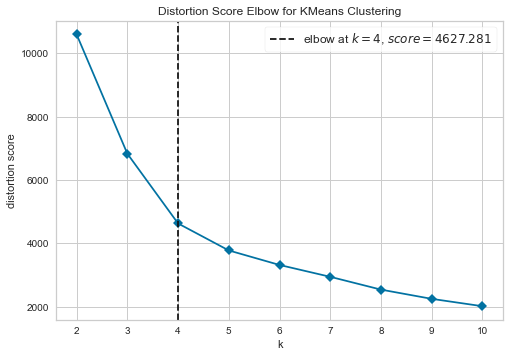

In [20]:
# Plottar o elbow para identificar o melhor ponto de quantidade de clusters
plot_model(kmeans, plot='elbow')

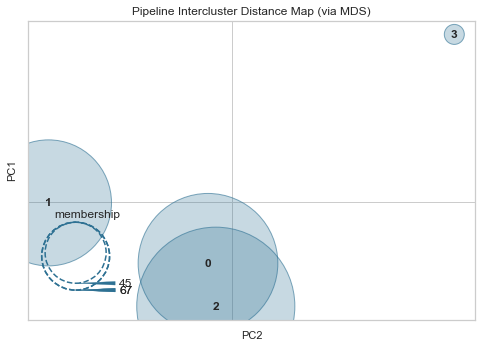

In [21]:
# Plottar o 'distance' para exibir a distância entre os clusters
plot_model(kmeans,plot='distance')

In [23]:
# Simulando a predição dos dados com o modelo treinado
# Caso venha um dado novo, onde este será encaixado? Qual cluster?
pred_new = predict_model(kmeans, data=data)
pred_new.head()

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,Cluster
0,Arab World,2.004868,2.014602,2.071309,2.177712,2.331000,2.333596,2.588751,2.540238,2.450415,...,2.133038,2.166872,2.101233,2.830067,2.489631,2.539570,2.711262,2.895427,3.073161,Cluster 2
1,Caribbean small states,2.801518,2.856684,2.997157,2.989451,2.767858,2.826752,2.679969,2.888693,2.740593,...,2.650900,2.790665,2.822913,3.408651,3.264064,3.087653,3.314303,3.318432,3.260012,Cluster 2
2,Central Europe and the Baltics,4.678528,4.753209,4.604574,4.499988,4.679082,4.539711,4.666272,4.900196,5.100249,...,4.841450,4.809057,5.054785,5.394921,5.284380,5.096212,5.041317,5.029266,5.017717,Cluster 0
3,Early-demographic dividend,2.203164,2.156632,2.227311,2.364100,2.454394,2.450555,2.527081,2.347702,2.363263,...,2.369884,2.385251,2.405126,2.701260,2.507131,2.495491,2.497340,2.586701,2.665603,Cluster 2
4,East Asia & Pacific,4.429090,4.203152,4.244351,4.453984,4.626920,4.688849,4.684790,4.613537,4.635098,...,4.367146,4.297394,4.434848,4.865241,4.775817,4.871727,4.866869,4.643221,4.571448,Cluster 0


In [24]:
# Salvar o modelo treinado do kmeans
# Por exemplo, jogar o modelo em produção
save_model(kmeans, model_name='kmeans')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['Country Name'],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='UNSUPERVISED_DUMMY_TARGET',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='most frequent',
                                 fill_value_categorical=None,
                                 fill_value_n...
                 ('fix_perfect', 'passthrough'),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                

In [25]:
# Jogar o modelo em produção
loaded_model = load_model('kmeans')

Transformation Pipeline and Model Successfully Loaded


In [26]:
print(loaded_model)

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True,
                                      features_todrop=['Country Name'],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[],
                                      target='UNSUPERVISED_DUMMY_TARGET',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fill_value_n...
                ('fix_perfect', 'passthrough'),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',

In [28]:
# Para deploy em um bucket da AWS
deploy_model(kmeans, model_name = 'kmeans-aws', authentication = {'bucket' : 'pycaret-test'})

## Regressão
-----------------------------------------------------------

In [33]:
# Baixando novo ds de 'insurance'
# A tabela retorna tarifas a partir de features listadas
data = get_data('insurance')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Iniciando setup do pycaret para regressão
##### Vamos utilizar a regressão para...
- Casos supervisionados
- Possuem target, ou seja, uma saída de dados com bases em features
- Possui a parte de treino e testes
    - Transformed Train Set	(936, 14)
    - Transformed Test Set	(402, 14)

In [34]:
from pycaret.regression import *

# target: qual a saída? 'charges'
# session_id: id da sessão
# log_experiment: para armazenar em log as informações
reg1 = setup(data, target='charges', session_id=123, log_experiment=True, experiment_name='insurance1')

,Description,Value
0,session_id,123
1,Target,charges
2,Original Data,"(1338, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(936, 14)"


###### Como comparar modelos?
- Na parte de ML, temos um conjunto de dados. 
    * Parte desses dados são usadas para treinamento e outra parte é usada para validar o treinamento
- fold=5
    * Os dados são divididos em 5 partes iguais
    * 4 são usadas para treinar 20 algorítmos
    * 1 é usada para testar o treinamento

In [35]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2671.1115,23031333.9247,4795.9477,0.8391,0.4429,0.3133,0.0440
rf,Random Forest Regressor,2766.9803,25262509.6700,5023.3122,0.8223,0.4812,0.3431,0.1720
lightgbm,Light Gradient Boosting Machine,3018.9895,25515012.2780,5049.8492,0.8192,0.5534,0.3876,0.0460
et,Extra Trees Regressor,2804.9711,28728744.5101,5351.1199,0.8004,0.4932,0.3334,0.1620
ada,AdaBoost Regressor,4366.1001,29298215.0099,5411.0606,0.7915,0.6478,0.7662,0.0200
llar,Lasso Least Angle Regression,4326.7373,38523195.1094,6194.6384,0.7345,0.6004,0.4409,0.0120
lr,Linear Regression,4332.7660,38549953.2000,6197.0844,0.7343,0.6369,0.4415,1.5140
lasso,Lasso Regression,4332.6329,38543898.4000,6196.6074,0.7343,0.6404,0.4416,0.0120
ridge,Ridge Regression,4347.7178,38551636.4000,6197.1511,0.7343,0.6217,0.4443,0.0120
br,Bayesian Ridge,4344.6330,38551085.7398,6197.1147,0.7343,0.6400,0.4437,0.0100


- Melhor modelo: gbr

In [37]:
# Criar o modelo com o escolhido
gbr = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2726.1095,21572648.1936,4644.6365,0.8712,0.4412,0.3314
1,3022.5537,32047515.9873,5661.0526,0.8137,0.4542,0.2882
2,2554.0978,21324521.0857,4617.8481,0.7300,0.4760,0.3072
3,2830.5469,21785291.7575,4667.4717,0.8181,0.4471,0.3480
4,2888.2098,27291661.9275,5224.1422,0.7970,0.5195,0.3473
5,2522.7354,18721684.9052,4326.8562,0.8796,0.3360,0.2348
6,2489.0907,19855612.4462,4455.9637,0.8649,0.3574,0.2832
7,2709.6859,24817886.8884,4981.7554,0.8635,0.4281,0.2666
8,2335.3814,17855658.6798,4225.5957,0.8847,0.3996,0.3157
9,2949.2692,27148082.5381,5210.3822,0.8251,0.5380,0.3907


In [38]:
import numpy as np

# Criando vários modelos alterando o 'learning_rate' (taxa de aprendizagem) de 0.1 até 1
# Vai processar o comando anterior, apenas modificando a taxa de aprendizagem 
gbrs = [create_model('gbr', learning_rate = i) for i in np.arange(0.1,1,0.1)]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,4011.2977,45222488.6152,6724.7668,0.7299,0.7478,0.5450
1,4430.8598,47902130.5445,6921.1365,0.7215,0.6373,0.4994
2,3970.1247,41045256.3153,6406.6572,0.4803,0.7853,0.6919
3,4124.8848,41665205.7945,6454.8591,0.6521,0.6445,0.5541
4,4688.7278,52103915.0210,7218.3042,0.6125,1.0525,0.6343
5,3963.9702,38660608.4427,6217.7656,0.7513,0.6143,0.3953
6,3408.9527,30329267.3858,5507.2014,0.7936,0.7121,0.4548
7,3758.4358,33906064.0171,5822.8914,0.8136,0.9610,0.4604
8,3579.3452,36345496.5244,6028.7226,0.7652,0.6452,0.5782
9,4906.6301,55392042.8475,7442.5831,0.6432,0.7619,0.8356


In [40]:
gbrs # Imprimir os 10 modelos criados

[GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=False),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.2, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                   

###### Otimização de um modelo
- Cada modelo tem hiperparâmetros diferentes, que são variáveis que podem fazer ajustes no modelo
- Estes hiperparâmetros podem ser usados para dar uma tunada no modelo com o 'tune_model'
- MAE	MSE	RMSE	R2	RMSLE	MAPE

In [41]:
# Aprimorar o modelo pelo 'R2'
tuned_gbr = tune_model(gbr, n_iter=50, optimize='R2')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2749.4041,22173514.3738,4708.8761,0.8676,0.5096,0.3681
1,3018.0286,29957379.2212,5473.3335,0.8258,0.4426,0.3067
2,2918.1349,23480166.0643,4845.6337,0.7027,0.5334,0.4290
3,3039.9396,23857917.6346,4884.4567,0.8008,0.5229,0.4613
4,3054.8790,29011890.7429,5386.2687,0.7842,0.5249,0.3458
5,2684.4443,19975423.0230,4469.3873,0.8715,0.3762,0.2844
6,2451.6536,19958259.8912,4467.4668,0.8642,0.3664,0.2811
7,2618.0097,25227360.7681,5022.6846,0.8613,0.4571,0.2449
8,2588.3124,19520821.8295,4418.2374,0.8739,0.4575,0.3820
9,2944.6161,27231321.1236,5218.3638,0.8246,0.5162,0.3759


In [42]:
# Criando novo modelo do tipo 'dt' - ensemble
#### dt = decision tree
# O modelo ensemble é a junção de vários modelos
# É como se houvesse vários juízes para decidir uma saída
dt = create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3001.2294,37001480.2590,6082.8842,0.7790,0.4984,0.3140
1,3389.8885,49305179.5732,7021.7647,0.7133,0.5574,0.3361
2,2926.0191,42025684.6666,6482.7220,0.4679,0.6215,0.4025
3,2744.7144,34078761.4507,5837.7017,0.7154,0.5412,0.3740
4,3924.4816,59489464.3207,7712.9414,0.5575,0.6455,0.4796
5,3322.5435,42747575.4453,6538.1630,0.7250,0.4869,0.2928
6,3158.7047,49369669.1652,7026.3553,0.6641,0.4511,0.3089
7,2405.2970,31318616.6440,5596.3038,0.8278,0.4497,0.1434
8,3021.5461,39091793.3775,6252.3430,0.7475,0.5117,0.4381
9,3588.9772,53231891.5889,7296.0189,0.6571,0.5679,0.3653


In [43]:
bagged_dt = ensemble_model(dt, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2638.0841,22151291.8024,4706.5159,0.8677,0.4746,0.3378
1,2830.0380,31025098.7403,5570.0178,0.8196,0.4669,0.2744
2,2815.0561,24627133.6410,4962.5733,0.6882,0.5523,0.4036
3,2863.5967,24980823.9156,4998.0820,0.7914,0.5334,0.4367
4,3053.2275,30874815.5263,5556.5111,0.7704,0.5583,0.3749
5,2797.2817,22579623.2850,4751.8021,0.8548,0.3688,0.2601
6,2587.3709,22243351.5999,4716.2858,0.8486,0.3790,0.2968
7,2613.3303,23886642.2418,4887.3963,0.8687,0.4335,0.2416
8,2269.4941,17774301.6172,4215.9580,0.8852,0.4304,0.3432
9,2833.7279,29680679.0739,5447.9977,0.8088,0.5143,0.3482


In [44]:
boosted_dt = ensemble_model(dt, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,2625.7707,31947468.0218,5652.2091,0.8092,0.4938,0.3098
1,2531.3385,35255576.1240,5937.6406,0.7950,0.4772,0.2374
2,1994.9012,22643534.8441,4758.5223,0.7133,0.4754,0.1624
3,2263.2457,26330803.3299,5131.3549,0.7801,0.4381,0.2370
4,2825.7310,36112056.2013,6009.3308,0.7314,0.5931,0.3187
5,2843.6506,33398231.8802,5779.1203,0.7852,0.4463,0.2437
6,1878.9265,22609240.7667,4754.9175,0.8462,0.3517,0.1553
7,2375.6975,32011526.7874,5657.8730,0.8240,0.4826,0.1623
8,1624.2342,14926397.0008,3863.4696,0.9036,0.2373,0.1194
9,2448.7047,33628422.8803,5799.0019,0.7834,0.4948,0.2269


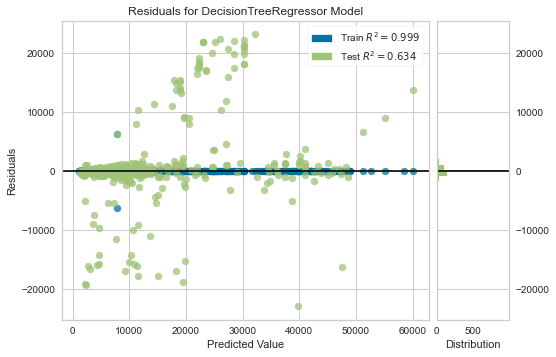

In [45]:
plot_model(dt)

- Aconteceu um overfit

- Aprendeu normalmente para os dados de Train (treino)
    - Aprendeu
- Não teve capacidade de generalizar para os dados de teste nesta regressão
    - Não consegue prever com novos dados

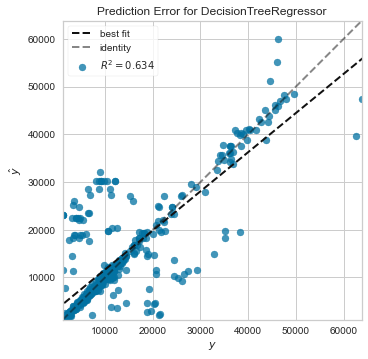

In [47]:
# Plottando os erros do modelo
plot_model(dt,plot='error')

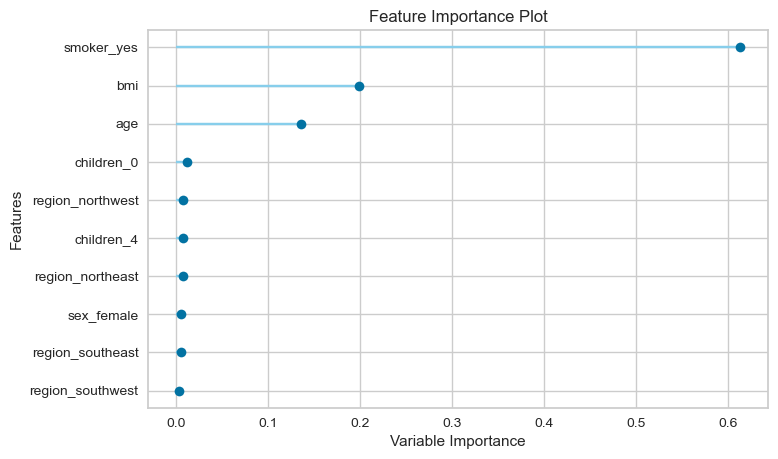

In [48]:
# Plottar o grau de relavância de cada feature com relação à saída
plot_model(dt,plot='feature')

In [49]:
# Plotta todos os gráficos disponíveis no modelo
evaluate_model(dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

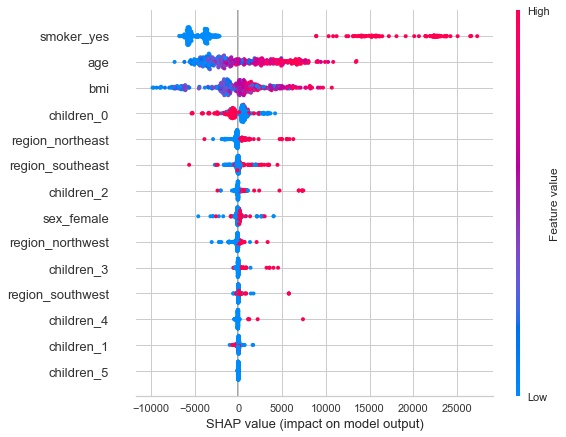

In [53]:
#!pip install shap

# Interpretabilidade do modelo, ou seja, a melhor forma de apresentar (interpretar) os dados do modelo
interpret_model(dt)

- smoker_yes tem alta taxa no impacto no resultado do modelo
- Se usar as 5 primeiras variáveis já daria um retorno bom
- children_* não tem impacto

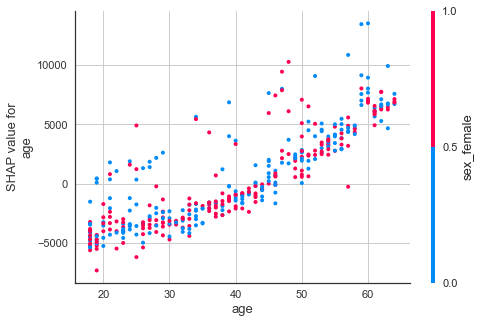

In [54]:
interpret_model(dt,plot='correlation')

In [55]:
# Aprimorar o modelo pelo 'R2'
best = automl(optimize='R2')
best

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=123, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
# Cria um modelo preditivo
# Pega todas as variáveis de entrada, joga pro modelo e emite o resultado
pred = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2386.2018,17296249.1379,4158.8759,0.8789,0.3985,0.2922


In [58]:
pred.head()

,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,49.0,42.680000,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9800.888672,10621.483595
1,32.0,37.334999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,4667.607422,7290.151941
2,27.0,31.400000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34838.871094,36012.959871
3,35.0,24.129999,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5125.215820,7553.788882
4,60.0,25.740000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,12142.578125,14904.032497


## Regras de associação
-----------------------------------------------------------

In [61]:
data = get_data('france')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France


In [62]:
from pycaret.arules import *

In [69]:
# Criar associações a partir dos dados da amostra
# Exemplo: 
### 90% de pessoas que compram fralda de madrugada, também compram um cerveja...
### 10% de pessoas que compram camiseta, também leval um sapato...
s = setup(data, 'InvoiceNo', item_id='Description')

Description,Value
session_id,6093
# Transactions,461
# Items,1565
Ignore Items,None


In [64]:
model = create_model()

In [65]:
model

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(JUMBO BAG WOODLAND ANIMALS),(POSTAGE),0.0651,0.6746,0.0651,1.0000,1.4823,0.0212,inf
1,"(SET/6 RED SPOTTY PAPER PLATES, SET/20 RED RET...",(SET/6 RED SPOTTY PAPER CUPS),0.0868,0.1171,0.0846,0.9750,8.3236,0.0744,35.3145
2,"(SET/6 RED SPOTTY PAPER CUPS, SET/20 RED RETRO...",(SET/6 RED SPOTTY PAPER PLATES),0.0868,0.1085,0.0846,0.9750,8.9895,0.0752,35.6616
3,"(POSTAGE, SET/6 RED SPOTTY PAPER PLATES, SET/2...",(SET/6 RED SPOTTY PAPER CUPS),0.0716,0.1171,0.0694,0.9697,8.2783,0.0610,29.1345
4,"(SET/6 RED SPOTTY PAPER CUPS, POSTAGE, SET/20 ...",(SET/6 RED SPOTTY PAPER PLATES),0.0716,0.1085,0.0694,0.9697,8.9406,0.0617,29.4208
...,...,...,...,...,...,...,...,...,...
136,(STRAWBERRY LUNCH BOX WITH CUTLERY),(LUNCH BOX WITH CUTLERY RETROSPOT ),0.1041,0.1236,0.0542,0.5208,4.2124,0.0414,1.8289
137,(LUNCH BAG APPLE DESIGN),(LUNCH BAG RED RETROSPOT),0.1085,0.1323,0.0564,0.5200,3.9298,0.0420,1.8077
138,(LUNCH BAG APPLE DESIGN),(LUNCH BAG SPACEBOY DESIGN ),0.1085,0.1041,0.0564,0.5200,4.9942,0.0451,1.8664
139,"(POSTAGE, PLASTERS IN TIN CIRCUS PARADE )",(PLASTERS IN TIN SPACEBOY),0.1258,0.1193,0.0629,0.5000,4.1909,0.0479,1.7614


In [66]:
plot_model(model)

In [67]:
plot_model(model, plot='3d')

In [68]:
get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N
